# Mission **$\beta$**

<div>
<img src="Images\Mission beta\Mission beta.jpg" width="500"/>
</div>

In this notebook, is divided in the following Sections:
1) Density matrix
2) Liouville-von Neumann equation
3) Quantum Master Equation (QME)
4) Lindblad equation
5) Vectorization/Choi-Jamiolkowski isomorphism

Now, we import some libraries

In [1]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
from qutip import sigmax, sigmaz, sigmay, tensor, identity
from qutip import Bloch, Qobj, basis, mesolve
from IPython.display import Image, display, Math

define a function for matrix visualization in LaTeX

In [2]:
def array_to_latex(array, real = False):
    array = array.real if real else array
    matrix = ''
    for row in array:
        try:
            for number in row:
                matrix += f'{number}&'
        except TypeError:
            matrix += f'{row}&'
        matrix = matrix[:-1] + r'\\'
    display(Math(r'\begin{bmatrix}'+matrix+r'\end{bmatrix}'))

## 1) Density matrix

The most general description of a quantum system is given by the density matrix:

$$ \rho(t) = \sum_{k} p_{k} | \psi_{k}(t)\rangle \langle \psi_{k}(t) | $$

where $p_{k}$ is the probability that the system is described by the state vector $| \psi_{k}(t) \rangle $.
If $p_{k} = \delta_{kk'} $, the system is said to be in a pure state, otherwise the system is in a mixed state.

Given an orthonormal basis, the density matrix can be written as:

$$ \rho(t) = \sum_{n,m} \rho_{nm}(t) | n \rangle \langle m | $$

where the diagonal elements $\rho_{nn}(t) = |c_{n}(t)|^{2} = |c_{n}(t_{0})|^2$ are known as populations (probability that the system is in a certain state), while the off-diagonal elements $\rho_{nm}(t) = c_{n}(t) c_{m}^{*}(t)$ are known as coherences (phase relation between different states $\rightarrow$ quantum superposition). 

The following relation must be satisfied:

$$ |\rho_{nm}|^2 \leq \rho_{nn} \rho_{mm} $$

Properties of the density matrix:
- hermitian $\rho = \rho^{\dagger}$
- unitary trace $Tr\{ \rho \} = 1$
- positive semi-definite: $p_{k} \geq 0$

In order to understand if a state is pure or mixed, we can use the purity:

$$ Tr\{ \rho^2 \} \leq 1 $$

where the equality holds for a pure state, otherwise the state is mixed. 

In [3]:
psi_a = np.array([1,0])
psi_b = np.array([0,1])
psi_ab = np.array([1,1]) / np.sqrt(2)

rho_1 = np.outer(psi_a, np.conj(psi_a)); array_to_latex(rho_1)
rho_2 = np.outer(psi_ab, np.conj(psi_ab)); array_to_latex(rho_2) # Now you know what numerical accuracy is...
rho_3 = 0.5 * np.outer(psi_a, np.conj(psi_a)) + 0.5 * np.outer(psi_b, np.conj(psi_b)); array_to_latex(rho_3)

purity_1 = np.trace(rho_1 @ rho_1); print('Purity 1 = ', purity_1)
purity_2 = np.trace(rho_2 @ rho_2); print('Purity 2 = ', purity_2)
purity_3 = np.trace(rho_3 @ rho_3); print('Purity 3 = ', purity_3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Purity 1 =  1
Purity 2 =  0.9999999999999996
Purity 3 =  0.5


## Liouville-von Neumann Equation

The density matrix evolves according to the Liouville-von Neumann equation:

$$ \frac{d}{dt} \rho(t) = - \frac{i}{\hbar} [H, \rho(t)] $$

where $[A, B] = AB - BA$ is the commutator. This equation can be derived directly from the Schrödinger equation and it represents a quantum analogue of the (classical) Liouville equation.

Notice that, for a pure state, solving the Liouville-von Neumann equation is analogous to solving the Schrödinger equation but it results more computationally demanding!

## Quantum Master Equation (QME)

The Quantum Master Equation is an equation of motion for the density matrix:

$$ \frac{d}{dt} \rho(t) = -\frac{i}{\hbar} \left[ H, \rho(t) \right] + \mathcal{D}[\rho(t)]$$

where the first term represents the (coherent) unitary evolution due to the system Hamiltonian, while the second term is the dissipator which rules the (incoherent) relaxation and decoherence processes in the system due to the interaction with an environment (e.g., vibrations, phonons, solvent). 

There are several approaches which allows to define a form for the dissipator $\mathcal{D}[\cdot]$. These can be distinguished into:

- axiomatic approach: the QME is deduced from mathematical properties 
- constructive approach: the QME is derived from a microscopic model

## Lindblad equation

Lindblad equation is a QME which rules the evolution of the density matrix of the system:

$$ \frac{d}{dt} \rho(t) = -\frac{i}{\hbar} \left[ H, \rho(t) \right] + \sum_{k} \gamma_{k} \left( L_{k} \rho(t) L_{k}^{\dagger} - \frac{1}{2} \left\{  L_{k}^{\dagger} L_{k}, \rho(t) \right\} \right)$$

where $[A, B] = AB - BA$ is the commutator, $\{ A, B \} = AB + BA$ is the anticommutator, while $L_{k}$ are the Lindblad operators (or jump operators).

The Lindblad equation ensures two important properties of the evolution (dynamical map):

- trace-preserving
- completely positive

## Vectorization/Choi-Jamiolkowski isomorphism

The Choi-Jamiolkowski isomorphism establishes a mapping between:

$$
\begin{matrix}
\text{Hilbert} & & \text{Liouville}\\ 
ABC & \rightarrow & (C^{T} \otimes A) \text{vec}(B)
\end{matrix}
$$

In this way, the Lindblad equation can be written as:

$$\frac{d}{dt} \text{vec}\{\rho(t)\} = \mathcal{L} \text{vec}\{\rho(t)\}$$

where the Liouvillian superoperator is:

$$\mathcal{L} = -\frac{i}{\hbar} (I \otimes H - H^T \otimes I ) + \sum_{k} \gamma_{k} \left( L_{k}^{*} \otimes L_{k} - \frac{1}{2} I \otimes L_{k}^{\dagger} L_{k} - \frac{1}{2} (L_{k}^{\dagger}L_{k})^{T} \otimes I \right)$$

and

$$
\rho(t) = 
\begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix}
\qquad
\text{vec}\{ \rho(t) \} = 
\begin{bmatrix}
a \\
b \\
c \\
d
\end{bmatrix}
$$

Now, we define a generic function for the creating the Liouvillian and another one for its time propagator.

In [4]:
def Liouvillian(H, gamma_k, L_k):
    I = np.eye(H.shape[0])
    super_L = -1.j * (np.kron(I, H) - np.kron(H.T, I))
    for k in range(len(gamma_k)):
        super_L += gamma_k[k] * (np.kron(np.conj(L_k[k]), L_k[k]) - 0.5 * np.kron(I, np.conj(L_k[k]).T @ L_k[k]) - 0.5 * np.kron((np.conj(L_k[k]).T @ L_k[k]).T, I))
    return super_L

def Liouville_evo(rho, super_L, t_list):
    dt = t_list[1] - t_list[0]
    rho_vec = np.reshape(rho,(rho.size))
    rho_vec_list = np.zeros((rho.size, len(t_list)), dtype=complex)
    rho_vec_list[:,0] = rho_vec
    super_U = expm(super_L * dt)
    for i in range(1,len(t_list)):
        rho_vec_list[:,i] = super_U @ rho_vec_list[:,i-1]
    return rho_vec_list

Imagine we have a TLS described on the eigenbasis.
We have already seen that the Hamiltonian dynamics is a phase dynamics.

Here, we insert two relaxation processes now: the relaxation to the ground state, with a rate $\gamma_d$, and an excitation to the excited state, with rate $\gamma_u$.
Look at the Liouvillian.

In [17]:
gamma_d = 0.1; gamma_u = 0.0

H = np.array([[0, 0], [0, 1]])
print('Only Hamiltonian'); array_to_latex(Liouvillian(H, [], []))

sigmam = (sigmax() + 1.j * sigmay()) / 2; sigmap = (sigmax() - 1.j * sigmay()) / 2
gamma_k = [gamma_d, gamma_u]; L_k = [sigmam.full(), sigmap.full()] 

super_L = Liouvillian(H, gamma_k, L_k)
print('With relaxations'); array_to_latex(super_L)

Only Hamiltonian


<IPython.core.display.Math object>

With relaxations


<IPython.core.display.Math object>

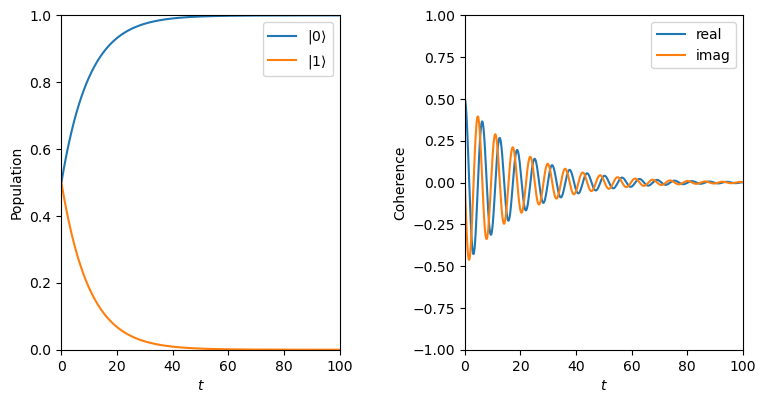

In [18]:
dt = 0.1; t_list = np.arange(0, 100 + dt, dt)

rho = np.array([[0.5, 0.5],
                [0.5, 0.5]], dtype=complex)
rho_vec_list = Liouville_evo(rho, super_L, t_list)
    
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(t_list, np.real(rho_vec_list[0, :]), label=r'$| 0 \rangle$')
ax1.plot(t_list, np.real(rho_vec_list[3, :]), label=r'$| 1 \rangle$')
ax1.set_xlim(0, t_list[-1]); ax1.set_ylim(0, 1); ax1.set_xlabel(r'$t$'); ax1.set_ylabel('Population'); ax1.legend()
ax2.plot(t_list, np.real(rho_vec_list[1, :]), label='real')
ax2.plot(t_list, np.imag(rho_vec_list[1, :]), label='imag')
ax2.set_xlim(0, t_list[-1]); ax2.set_ylim(-1, 1); ax2.set_xlabel(r'$t$'); ax2.set_ylabel('Coherence'); ax2.legend()
fig.tight_layout(); fig.set_size_inches(8, 4); fig.set_dpi(100)

Let's visualize the dynamics of our TLS on the Bloch sphere.

In green, we show the precession axis dictated by the system Hamiltonian.

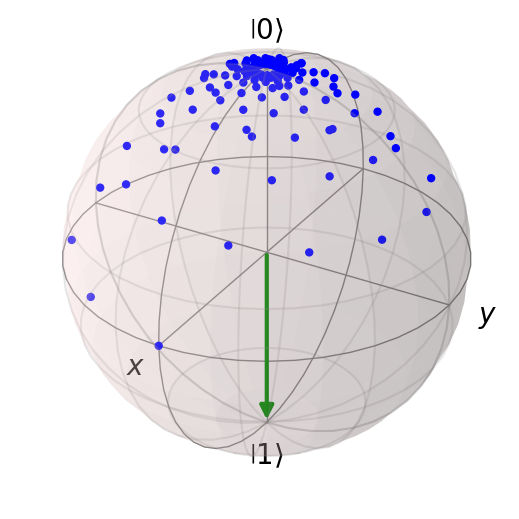

In [20]:
gamma_d = 0.1; gamma_u = 0.0; H = np.array([[0, 0],[0, 1]]); dt = 0.5; t_list = np.arange(0, 60 + dt, dt)

sphere = Bloch()
result = mesolve(Qobj(H),
                 (basis(2 ,0) + basis(2, 1)) / np.sqrt(2),
                 t_list,
                 c_ops=[np.sqrt(gamma_d) * sigmam, np.sqrt(gamma_u) * sigmap],
                 e_ops=[sigmax(), sigmay(), sigmaz()])
sx, sy, sz = result.expect[0], result.expect[1], result.expect[2]
sphere.add_points([sx, sy, sz]); sphere.add_vectors([0., 0., -1.])
sphere.show()

If you want to produce an animated gif run the following code.

In [ ]:
import imageio.v2 as imageio
from os import listdir
from os.path import isfile, join
import shutil

In [ ]:
sphere = Bloch()
for i in range(len(sx)):
    sphere.clear()
    for j in range(i+1):
        sphere.add_points([sx[j], sy[j], sz[j]], alpha=np.exp((j-i)/15))
    sphere.add_vectors([0., 0., -1.])
    sphere.point_color ='b'; sphere.point_marker = 'o'; sphere.point_size = [25]
    sphere.make_sphere()
    sphere.save(name=r'temp_up_bloch\up_bloch_{}.png'.format(str(i).zfill(len(str(len(sx))))), dirc=r'temp_up_bloch')

filenames = [join('temp_up_bloch', filename) for filename in listdir('temp_up_bloch') if isfile(join('temp_up_bloch', filename))]
with imageio.get_writer('Images\Mission beta\movie_up_bloch.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
shutil.rmtree('temp_up_bloch')

<div>
<img src="Images\Mission beta\movie_up_bloch.gif" width="500"/>
</div>

Now, we look at another relaxation processes: dephasing.

In [21]:
# parameters
gamma_deph = 0.1

H = np.array([[0, 0], [0, 1]])

gamma_k = [gamma_deph]
L_k = [sigmaz().full()] 

super_L = Liouvillian(H, gamma_k, L_k)
array_to_latex(super_L)

<IPython.core.display.Math object>

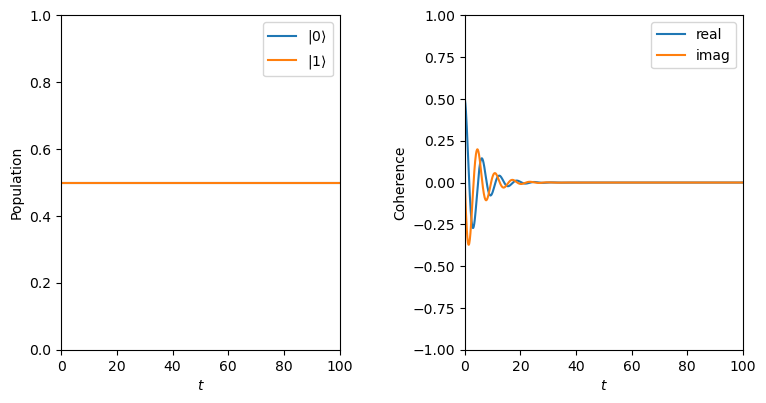

In [24]:
dt = 0.1; t_list = np.arange(0, 100 + dt, dt)

rho = np.array([[0.5, 0.5],
                [0.5, 0.5]], dtype=complex)
rho_vec_list = Liouville_evo(rho, super_L, t_list)
    
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(t_list, np.real(rho_vec_list[0, :]), label=r'$| 0 \rangle$')
ax1.plot(t_list, np.real(rho_vec_list[3, :]), label=r'$| 1 \rangle$')
ax1.set_xlim(0, t_list[-1]); ax1.set_ylim(0, 1); ax1.set_xlabel(r'$t$'); ax1.set_ylabel('Population'); ax1.legend()
ax2.plot(t_list, np.real(rho_vec_list[1, :]), label='real')
ax2.plot(t_list, np.imag(rho_vec_list[1, :]), label='imag')
ax2.set_xlim(0, t_list[-1]); ax2.set_ylim(-1, 1); ax2.set_xlabel(r'$t$'); ax2.set_ylabel('Coherence'); ax2.legend()
fig.tight_layout(); fig.set_size_inches(8, 4); fig.set_dpi(100)

Let's visualize the dynamics of our TLS on the Bloch sphere.

In green, we show the precession axis dictated by the system Hamiltonian.

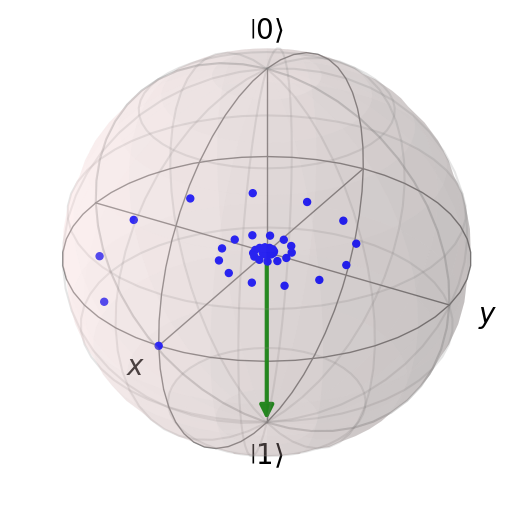

In [25]:
gamma_d = 0.1; gamma_u = 0.0; H = np.array([[0, 0],[0, 1]]); dt = 0.5; t_list = np.arange(0, 60 + dt, dt)

sphere = Bloch()
result = mesolve(Qobj(H),
                 (basis(2,0)+basis(2,1))/np.sqrt(2),
                 t_list,
                 c_ops=[np.sqrt(0.1) * sigmaz()],
                 e_ops=[sigmax(), sigmay(), sigmaz()])
sx, sy, sz = result.expect[0], result.expect[1], result.expect[2]
sphere.add_points([sx, sy, sz])
sphere.add_vectors([0., 0., -1.])
sphere.show()

If you want to produce an animated gif run the following code.

In [ ]:
sphere = Bloch()
for i in range(len(sx)):
    sphere.clear()
    for j in range(i+1):
        sphere.add_points([sx[j], sy[j], sz[j]], alpha=np.exp((j-i)/15))
    sphere.add_vectors([0., 0., -1.])
    sphere.point_color ='b'; sphere.point_marker = 'o'; sphere.point_size = [25]
    sphere.make_sphere()
    sphere.save(name=r'temp_deph_bloch\deph_bloch_{}.png'.format(str(i).zfill(len(str(len(sx))))), dirc=r'temp_deph_bloch')

filenames = [join('temp_deph_bloch', filename) for filename in listdir('temp_deph_bloch') if isfile(join('temp_deph_bloch', filename))]
with imageio.get_writer('Images\Mission beta\movie_deph_bloch.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
shutil.rmtree('temp_deph_bloch')

<div>
<img src="Images\Mission beta\movie_deph_bloch.gif" width="500"/>
</div>

## Stochastic Schrödinger Equation

Alternatively, it is possible to solve the state of the system as:

$$ d | \psi(t) \rangle = - i H | \psi(t) \rangle dt - \frac{1}{2} \sum_{k} \gamma_{k} L_{k}^{\dagger} L_{k} | \psi(t) \rangle dt - i \sum_{k} \sqrt{\gamma_{k}} L_{k} | \psi(t) \rangle dW_{k}(t)$$

In [33]:
dt = 0.001; t_list = np.arange(0, 10 + dt, dt)

trajectories = 1000

gamma_deph = 0.1

H = np.array([[0, 0], [0, 1]], dtype=complex)

L_deph = sigmaz().full()

psi = np.ones((2, trajectories), dtype=complex) / np.sqrt(2)

psi_list = np.zeros((2, trajectories, len(t_list)), dtype=complex)
psi_list[:,:,0] = psi

for m in range(trajectories):
    for i in range(1,len(t_list)):
        dW = np.random.normal(0, 1, 1) * np.sqrt(dt)
        psi_list[:,m,i] = psi_list[:,m,i-1] + (- 1.j * H * dt - 0.5 * gamma_deph * np.conj(L_deph.T) @ L_deph * dt - 1.j * np.sqrt(gamma_deph) * L_deph * dW) @ psi_list[:,m,i-1]

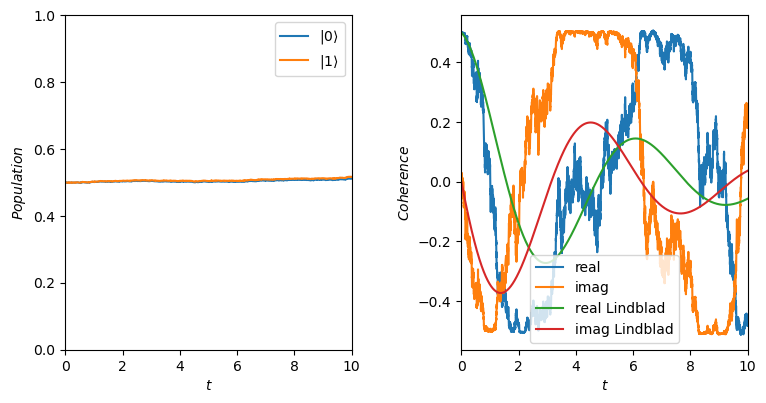

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(t_list, np.abs(psi_list[0,0,:])**2, label=r'$| 0 \rangle$')
ax1.plot(t_list, np.abs(psi_list[1,0,:])**2, label=r'$| 1 \rangle$')
ax1.set_xlim(0,t_list[-1]); ax1.set_ylim(0,1); ax1.set_xlabel(r'$t$'); ax1.set_ylabel(r'$Population$'); ax1.legend()

ax2.plot(t_list, np.real(np.conj(psi_list[0,0,:]) *  psi_list[1,0,:]), label='real')
ax2.plot(t_list, np.imag(np.conj(psi_list[0,0,:]) *  psi_list[1,0,:]), label='imag')
ax2.plot(t_list, np.real(Liouville_evo(rho, super_L, t_list)[1, :]), label='real Lindblad')
ax2.plot(t_list, np.imag(Liouville_evo(rho, super_L, t_list)[1, :]), label='imag Lindblad')
ax2.set_xlim(0,t_list[-1]); ax2.set_xlabel(r'$t$'); ax2.set_ylabel(r'$Coherence$'); ax2.legend();
fig.tight_layout(); fig.set_size_inches(8, 4); fig.set_dpi(100)
plt.show()

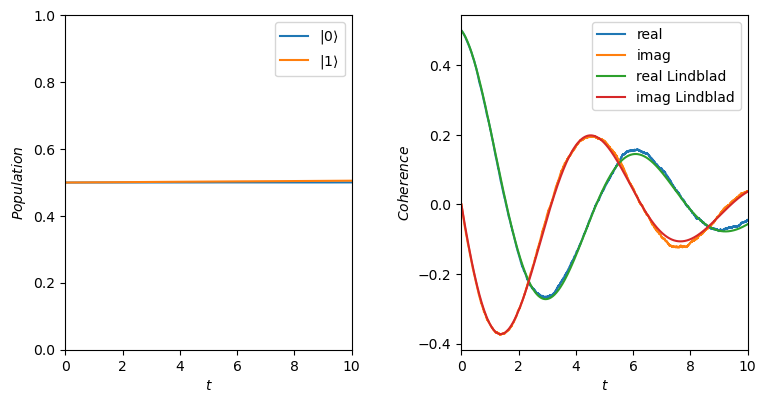

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(t_list, np.mean(np.conj(psi_list[0,:,:]) *  psi_list[0,:,:], axis=0), label=r'$| 0 \rangle$')
ax1.plot(t_list, np.mean(np.conj(psi_list[1,:,:]) *  psi_list[1,:,:], axis=0), label=r'$| 1 \rangle$')
ax1.set_xlim(0,t_list[-1]); ax1.set_ylim(0,1); ax1.set_xlabel(r'$t$'); ax1.set_ylabel(r'$Population$'); ax1.legend()

ax2.plot(t_list, np.real(np.mean(np.conj(psi_list[0,:,:]) *  psi_list[1,:,:], axis=0)), label='real')
ax2.plot(t_list, np.imag(np.mean(np.conj(psi_list[0,:,:]) *  psi_list[1,:,:], axis=0)), label='imag')
ax2.plot(t_list, np.real(Liouville_evo(rho, super_L, t_list)[1, :]), label='real Lindblad')
ax2.plot(t_list, np.imag(Liouville_evo(rho, super_L, t_list)[1, :]), label='imag Lindblad')
ax2.set_xlim(0,t_list[-1]); ax2.set_xlabel(r'$t$'); ax2.set_ylabel(r'$Coherence$'); ax2.legend()
fig.tight_layout(); fig.set_size_inches(8, 4); fig.set_dpi(100)
plt.show()